In [16]:
%matplotlib notebook
# Dependencies
import tweepy
import json
import pandas as pd
from config import consumer_key, consumer_secret, access_token, access_token_secret
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [9]:
target_users = ["@BBC","@CBS","@CNN","@FoxNews","@nytimes"]

@BBC
@CBS
@CNN
@FoxNews
@nytimes


In [6]:
df = pd.DataFrame(columns=["Source","Text","Date","Compound_Score","Positive_Score","Neutral_Score","Negative_Score","Tweets_Ago"])
df

Empty DataFrame
Columns: [Source, Text, Date, Compound_Score, Positive_Score, Neutral_Score, Negative_Score, Tweets_Ago]
Index: []

In [10]:
# Variables for holding sentiments
sentiments = []

# Target Account
for target_user in target_users:

# Counter
    counter = 1

# Variable for max_id
    oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

    # Get all tweets from home feed
        public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
        for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
            text = tweet["text"]
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            date = tweet["created_at"]
            tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
            sentiments.append({"Source":target_user,
                               "Text": text,
                               "Date": date, 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        
        # Add to counter 
            counter += 1

In [11]:
df = pd.DataFrame(sentiments)
df

Compound                            Date  Negative  Neutral  Positive  \
0      0.0000  Tue Aug 28 18:56:05 +0000 2018     1.000    0.000     0.000   
1      0.5423  Tue Aug 28 18:03:04 +0000 2018     0.780    0.000     0.220   
2      0.0000  Tue Aug 28 16:01:02 +0000 2018     1.000    0.000     0.000   
3      0.5994  Tue Aug 28 14:51:38 +0000 2018     0.795    0.000     0.205   
4      0.3612  Tue Aug 28 14:51:32 +0000 2018     0.848    0.000     0.152   
5      0.0000  Tue Aug 28 13:02:04 +0000 2018     1.000    0.000     0.000   
6      0.0000  Tue Aug 28 12:48:59 +0000 2018     1.000    0.000     0.000   
7      0.4767  Tue Aug 28 12:00:18 +0000 2018     0.728    0.000     0.272   
8      0.8316  Tue Aug 28 11:33:00 +0000 2018     0.630    0.000     0.370   
9     -0.2960  Tue Aug 28 11:01:01 +0000 2018     0.896    0.104     0.000   
10     0.4215  Tue Aug 28 08:00:16 +0000 2018     0.823    0.000     0.177   
11     0.0000  Tue Aug 28 07:26:06 +0000 2018     1.000    0.000     0.000   
12     0.1280  Tue Aug 28 07:00:13 +0000 2018     0.821    0.077     0.103   
13     0.6240  Mon Aug 27 20:01:03 +0000 2018     0.806    0.000     0.194   
14     0.0772  Mon Aug 27 19:36:00 +0000 2018     0.936    0.000     0.064   
15     0.5859  Mon Aug 27 19:03:04 +0000 2018     0.752    0.062     0.186   
16    -0.4939  Mon Aug 27 18:12:05 +0000 2018     0.862    0.138     0.000   
17     0.0000  Mon Aug 27 17:05:04 +0000 2018     1.000    0.000     0.000   
18     0.0772  Mon Aug 27 16:03:04 +0000 2018     0.944    0.000     0.056   
19     0.0000  Mon Aug 27 14:08:03 +0000 2018     1.000    0.000     0.000   
20     0.2960  Mon Aug 27 12:11:04 +0000 2018     0.891    0.000     0.109   
21     0.5719  Mon Aug 27 10:05:03 +0000 2018     0.793    0.000     0.207   
22     0.0000  Mon Aug 27 09:01:02 +0000 2018     1.000    0.000     0.000   
23    -0.3818  Mon Aug 27 08:10:04 +0000 2018     0.843    0.157     0.000   
24    -0.4003  Sun Aug 26 19:39:07 +0000 2018     0.828    0.172     0.000   
25    -0.7269  Sun Aug 26 19:13:06 +0000 2018     0.469    0.408     0.122   
26     0.0000  Sun Aug 26 18:05:00 +0000 2018     1.000    0.000     0.000   
27     0.5719  Sun Aug 26 16:46:09 +0000 2018     0.619    0.000     0.381   
28     0.0000  Sun Aug 26 16:32:00 +0000 2018     1.000    0.000     0.000   
29     0.2960  Sun Aug 26 15:05:02 +0000 2018     0.810    0.067     0.124   
..        ...                             ...       ...      ...       ...   
470    0.0000  Tue Aug 28 16:45:04 +0000 2018     1.000    0.000     0.000   
471    0.0000  Tue Aug 28 16:40:07 +0000 2018     1.000    0.000     0.000   
472    0.7506  Tue Aug 28 16:30:09 +0000 2018     0.748    0.000     0.252   
473    0.1779  Tue Aug 28 16:15:10 +0000 2018     0.788    0.091     0.120   
474    0.0000  Tue Aug 28 16:00:13 +0000 2018     1.000    0.000     0.000   
475    0.0000  Tue Aug 28 15:52:01 +0000 2018     1.000    0.000     0.000   
476   -0.7650  Tue Aug 28 15:45:10 +0000 2018     0.708    0.292     0.000   
477    0.4215  Tue Aug 28 15:30:08 +0000 2018     0.851    0.000     0.149   
478   -0.6997  Tue Aug 28 15:20:07 +0000 2018     0.757    0.243     0.000   
479   -0.4019  Tue Aug 28 15:10:07 +0000 2018     0.870    0.130     0.000   
480   -0.8316  Tue Aug 28 15:00:09 +0000 2018     0.672    0.328     0.000   
481    0.5106  Tue Aug 28 14:44:05 +0000 2018     0.845    0.000     0.155   
482   -0.6486  Tue Aug 28 14:29:03 +0000 2018     0.791    0.209     0.000   
483   -0.4588  Tue Aug 28 14:00:07 +0000 2018     0.850    0.150     0.000   
484   -0.3818  Tue Aug 28 13:50:03 +0000 2018     0.874    0.126     0.000   
485    0.6124  Tue Aug 28 13:40:03 +0000 2018     0.750    0.000     0.250   
486    0.2023  Tue Aug 28 13:15:08 +0000 2018     0.833    0.000     0.167   
487    0.0000  Tue Aug 28 13:00:08 +0000 2018     1.000    0.000     0.000   
488    0.2500  Tue Aug 28 12:45:04 +0000 2018     0.889    0.000     0.111   
489    0.0000  Tue Aug 28 1

In [ ]:
# Create plot
df_BBC = df.loc[df["Source"] = "@BBC"]
y_vals = df["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

<IPython.core.display.Javascript object>


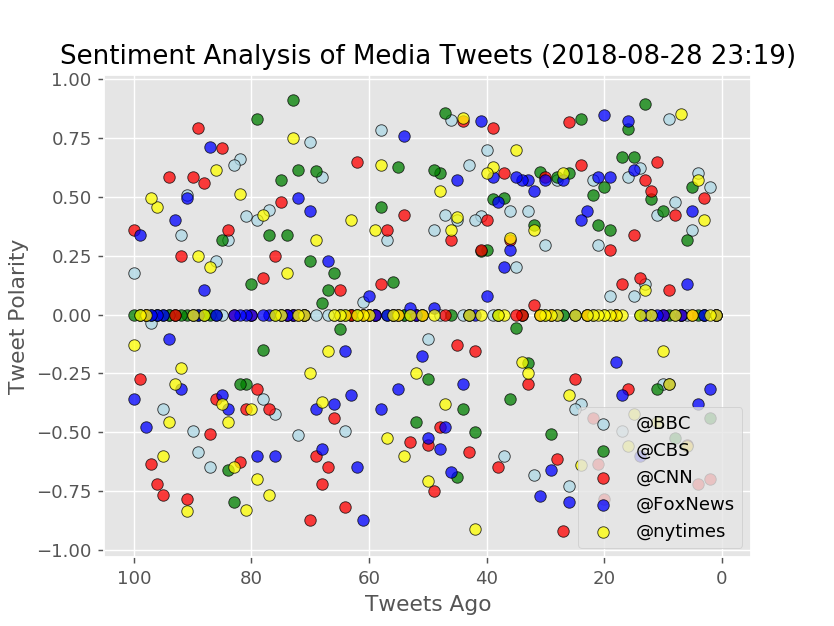

In [35]:

plt.figure()
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
count = 0
color = ["lightblue","green","red","blue","yellow"]
for target_user in target_users:
    df_temp = df.loc[df["Source"] == target_user]
    x_vals = df_temp["Tweets Ago"]
    y_vals = df_temp["Compound"]
    
    plt.scatter(x_vals,y_vals,marker="o", facecolors=color[count], edgecolors="black", s=40, alpha=0.75, label=target_user)
    count += 1
    
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim([105,-5]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()
plt.legend(loc="best")
plt.savefig("scatter.png")

<IPython.core.display.Javascript object>


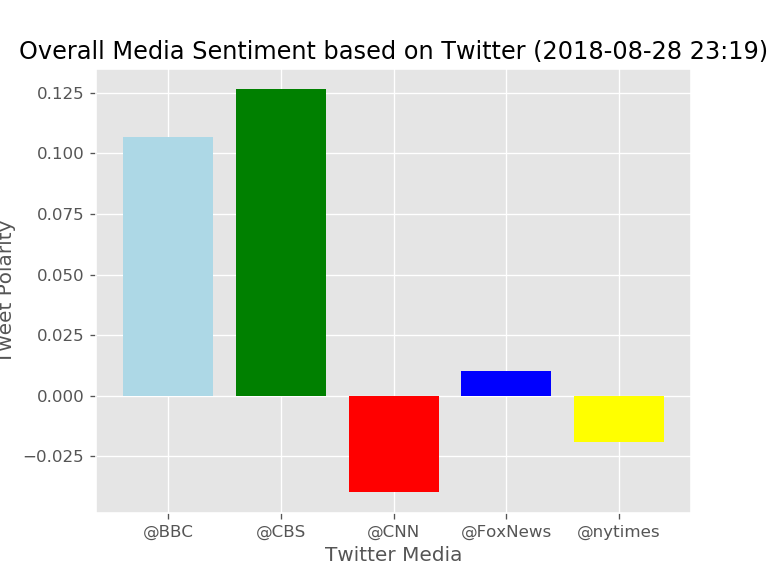

In [39]:
df_group_by = df.groupby(['Source'])
df_mean = df_group_by.mean()
df_mean = df_mean["Compound"]
plt.figure()
plt.bar(target_users, df_mean, color=color, alpha=1, align="center")
plt.title(f"Overall Media Sentiment based on Twitter ({now})")

plt.ylabel("Tweet Polarity")
plt.xlabel("Twitter Media")
plt.show()

plt.savefig("bar.png")

In [41]:
# Save DataFrame
df.to_csv("Twitter_Media.csv")

In [42]:
##  Analysis & Conclusions ##
# From these figures, we can find @BBC anbd @CBS shows higher polarity score that the other three media in last 100 tweets.
# And @CNN and @nytimes have negative polarity score.
# All five media polarity absolute values are very small -- nearly zero
# We can say all these media tweets are objective and not emotional.

In [92]:
## PlotBot
from pprint import pprint

In [ ]:
def update_twitter():

    # Create dictionary to hold text and label entities
    tweet_dict = {"text": [], "label": []}

    mentions = api.search(q="@BBC")
    print(mentions["statuses"][0]["entities"]["user_mentions"][0]["screen_name"])
    words = []

    try:
        command = mentions["statuses"][0]["entities"]["user_mentions"][0]["screen_name"]
        target_account = "@" + command
        print(target_account)
        oldest_tweet = None
        counter = 1
        sentiments = []

    #  500 tweets
        for x in range(25):

    # Get all tweets from home feed
            public_tweets = api.user_timeline(target_account, max_id = oldest_tweet)

    # Loop through all tweets 
            for tweet in public_tweets:
        
        # Run Vader Analysis on each tweet
                text = tweet["text"]
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                date = tweet["created_at"]
                tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
                oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
                sentiments.append({"Source":target_user,
                                   "Text": text,
                                   "Date": date, 
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": counter})
        
        # Add to counter 
                counter += 1

        df_2 = pd.DataFrame(sentiments)
        
        plt.figure()
        now = datetime.now()
        now = now.strftime("%Y-%m-%d %H:%M")
        plt.plot(df_2["Tweets Ago"],df_2["Compound"],marker = 'o',color="blue",label=target_account)
        plt.title(f"Sentiment Analysis of Tweet \n{target_account} ({now})")
        plt.xlim([510,-10]) #Bonus
        plt.ylabel("Tweet Polarity")
        plt.xlabel("Tweets Ago")
        plt.show()
        plt.legend(loc="best")    
        plt.savefig("fig" + target_account + ".png")
        api.update_with_media("fig.png", "@PlotBot Analyze:  " + target_account)
        #print(sentiments)
        
    except Exception:
        raise

Cybrarian64
@Cybrarian64


<IPython.core.display.Javascript object>


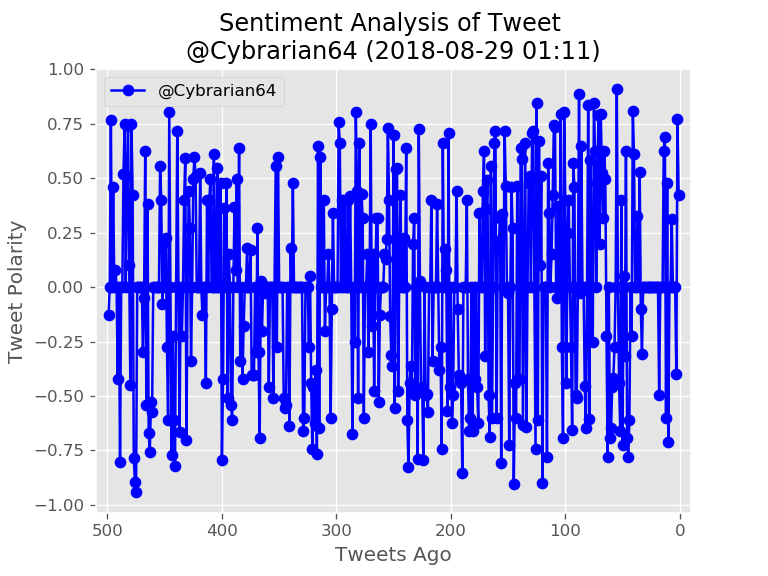

In [109]:
update_twitter()

DealingWithEvil
@DealingWithEvil


<IPython.core.display.Javascript object>


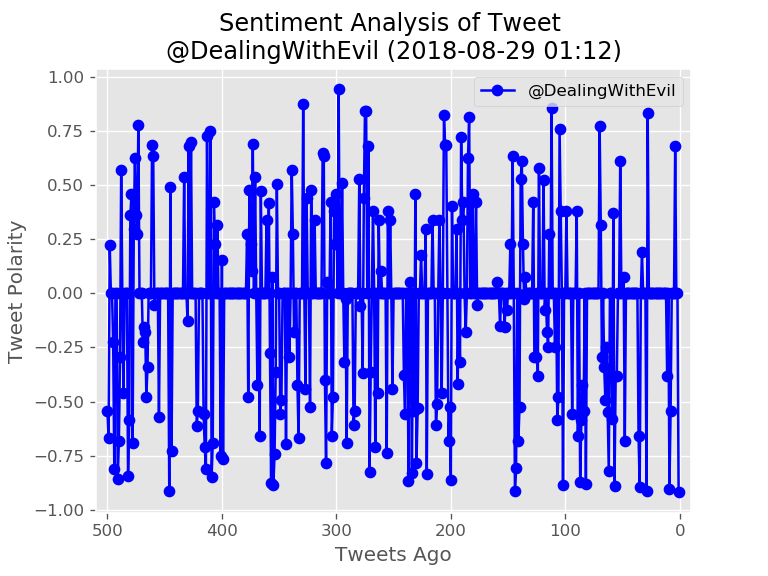

In [110]:
update_twitter()

WorldJewishCong
@WorldJewishCong


<IPython.core.display.Javascript object>


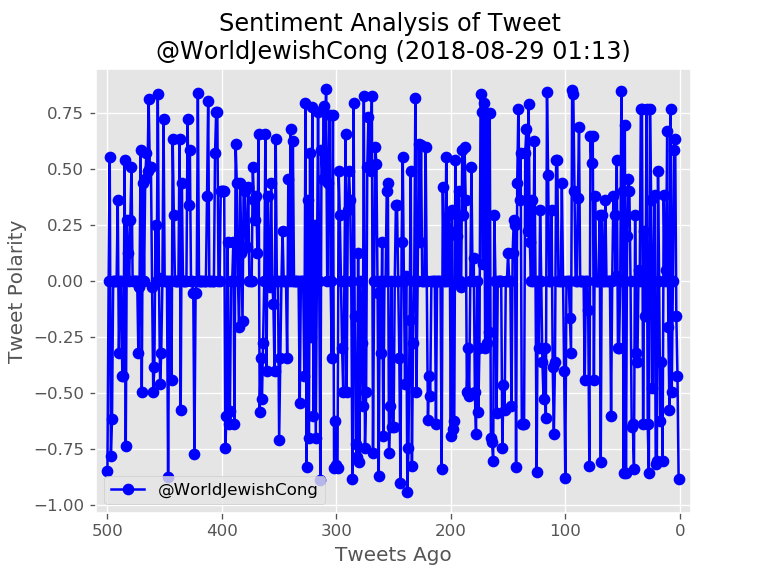

In [112]:
import time
minutes = 0
while minutes < 5:
    print("Updating Twitter")

    # Update the twitter
    update_twitter()

    # Wait a day
    time.sleep(60)

    # Update day counter
    minutes += 1